# The Perceptron

## Motivation: We want to classify data using a linear decision boundary

## Linear Hyperplane

Let $\mathbb{R}^{M}, M \in \mathbb{N}$ be a M-dimensional $\mathbb{R}$ vector space.

A linear hyperplane $H(w, w_{0}) := \{x \in \mathbb{R}^{M} | w^{T}x + w_{0} = 0\}$ is a sub-space with dimension one less then the dimension of the space $\mathbb{R}^{M}$

## A linear model for a linearly-separable binary classification

* Features $x \in \mathbb{R}^{N \times M}$
* Target $y_{i} \in \{-1, 1\}^{N}$


## Perceptron: Linear Classification Model

### Linear classification problem:

$$
\Large \text{$f(.;w,w_{0}): \mathbb{R}^{M} \longrightarrow \{-1, 1\}$ with parameters $w \in \mathbb{R}^{M}, w_{0} \in \mathbb{R}$}
$$

$$
\Large \text{$ w^{*} = argmin_{w} \sum_{i=1}^{N} Loss(y_{i}, f(.;w,w_{0}))$}
$$

### Linear model with a sign function:

$$
\Large \text{$f(x; w, w_{0}) := sign(w^{T}x + w_{0})$, with ${sign}(z) = 
\begin{cases} 
      1 & z > 0 \\
      0 & z = 0 \\
      -1 & z < 0 
   \end{cases}$}
$$

## Geometric Interpretation of the Linear Classifier
Classification errors can be formalized as:
$$
\Large \text{$ \forall i: y_{i}(w^{T}x_{i}+w_{0}<0$, or $\forall i: y_{i}sign(w^{T}x_{i}+w_{0})=-1$}
$$

## Optimizing the perceptron

__Loss__ over miss-classified instances $y_{i} \neq sign(w^{T}x_{i}+ w_{0})$ as:

$$
\Large \text{$ w^{*} = argmin_{w} \sum_{i=1, y_{i}f(x_{i; w})=-1}^{N} y_{i}(w^{T}x_{i} + w_{0})$}
$$


$$
\Large \text{Set $ L_{i} = Loss(y_{i}, f(x_{i}; w, w_{0}))$}
$$

Then we get the Gradient:

$$
\Large \text{$ \frac{\partial \sum_{i} L_{i}}{\partial w} = \sum_{i=1, y_{i}f(x_{i}; w)=-1}^{N} -y_{i}x_{i}$}
$$

$$
\Large \text{$ \frac{\partial \sum_{i} L_{i}}{\partial w_{0}} = \sum_{i=1, y_{i}f(x_{i}; w)=-1}^{N} -y_{i}$}
$$

Updating Parameters by step $\mu \in \mathbb{R}_{+}$ with $\forall (x_{i}, y_{i}): y_{i}f(x_{i}; w)=-1$:

$$
\Large \text{$ w^{(t)} \longleftarrow w^{(t-1)} + \mu y_{i}x_{i} $}
$$

$$
\Large \text{$ w_{0}^{(t)} \longleftarrow w_{0}^{(t-1)} + \mu y_{i} $}
$$




In [159]:
import numpy as np
import matplotlib.pyplot as plt

In [160]:
np.random.seed(42)

In [161]:
# Parameters

N = 50 # Number of points per class

class_neg = np.random.randn(N, 2) + [-2, -2]
labels_neg = -1 * np.ones(N)


class_pos = np.random.randn(N, 2) + [2, 2]
labels_pos = np.ones(N)

X_continues = np.linspace(-5, 5, 1000)

In [162]:
X = np.vstack((class_neg, class_pos))
y = np.concatenate((labels_neg, labels_pos))

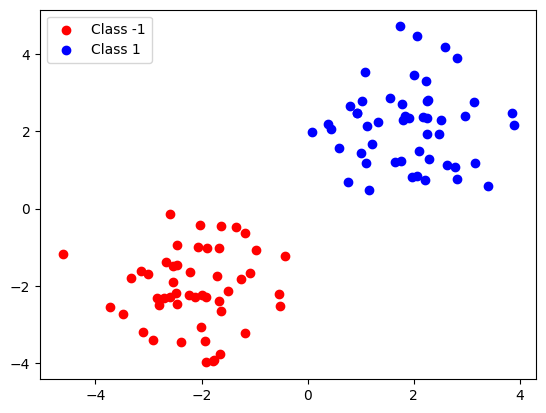

In [163]:
# Plot
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.show()

In [164]:
def plot_hyperplane(x:np.array, m: float, b: float) -> np.array:
    return x * m + b

In [165]:
class Perceptron:
    def __init__(self, M: int) -> None:
        self.w = np.random.rand(M)
        self.w0 = np.random.rand(1)

    def sign(self, z: float) -> int:
        if z == 0: return 0 
        elif z > 0: return 1
        return -1

    def train(self, X: np.array, y: np.array, learning_rate: float) -> None:
        errors = 1
        while errors > 0:
            errors = 0
            for i in range(len(y)):
                z = np.dot(self.w, X[i]) + self.w0
                if y[i] != self.sign(z):
                    errors = errors + 1
                    self.w = self.w + learning_rate * np.dot(y[i], X[i])
                    self.w0 = self.w0 + learning_rate * y[i]

In [166]:
perceptron = Perceptron(2)
perceptron.train(X, y, learning_rate=0.1)

In [167]:
print(f"w: {perceptron.w}")
print(f"w0: {perceptron.w0}")

w: [0.87737307 0.74076862]
w0: [0.69701574]


We got $w = (w_{1}, w_{2}) \in \mathbb{R}^{2} $ and $w_{0} \in \mathbb{R}$

We get $f(x; w, w_{0}) = w^{T}x + w_{0} = w_{1} x_{1} + w_{2}x_{2} + w_{0}$

$\implies -w_{2}x_{2} =w_{1} x_{1} + w_{0} $

$\implies x_{2} = - (\frac{w_{1}}{w_{2}}) x_{1} - \frac{w_{0}}{w_{2}} $

A linear function is given by $y = mx + b$

Now set $y = x_2$, $m =- (\frac{w_{1}}{w_{2}}) $ and $b =- \frac{w_{0}}{w_{2}} $

In [ ]:
# h = np.dot(w, x) + w0
# h = (w_1 * x_1 + w_2 * x_2) + w0
w = perceptron.w
w0 = perceptron.w0

slope = -(w[0] / w[1])
intercept = -(w0 / w[1])

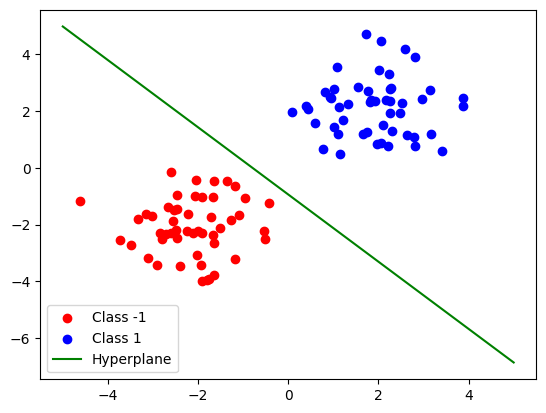

In [169]:
# Plot
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.plot(X_continues, plot_hyperplane(X_continues, slope,intercept), color='green', label='Hyperplane')
plt.legend()
plt.show()